In [1]:
import pandas as pd
import seaborn as sns
import csv
import numpy as np
import scikitplot as skplt
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
from sklearn.datasets import load_iris

%matplotlib inline

#Import relevant libraries 

c:\users\onayo\appdata\local\programs\python\python37\lib\site-packages\matplotlib\__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [2]:
data = pd.read_csv("600092_data.csv")
patients = data.copy()
patients.describe()

,Random,Id,IPSI
count,1520.000000,1520.000000,1516.000000
mean,0.509545,188365.022368,78.872032
std,0.284006,64355.870242,10.162351
min,0.000295,78261.000000,35.000000
25%,0.268531,137130.750000,73.000000
50%,0.517616,191344.500000,77.000000
75%,0.754724,244559.500000,85.000000
max,0.999448,295978.000000,99.000000


In [3]:
patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1520 entries, 0 to 1519
Data columns (total 11 columns):
Random          1520 non-null float64
Id              1520 non-null int64
Indication      1517 non-null object
Diabetes        1518 non-null object
IHD             1520 non-null object
Hypertension    1517 non-null object
Arrhythmia      1520 non-null object
History         1518 non-null object
IPSI            1516 non-null float64
Contra          1520 non-null object
label           1517 non-null object
dtypes: float64(2), int64(1), object(8)
memory usage: 130.8+ KB


In [4]:
patients.dtypes

Random          float64
Id                int64
Indication       object
Diabetes         object
IHD              object
Hypertension     object
Arrhythmia       object
History          object
IPSI            float64
Contra           object
label            object
dtype: object

# Useful Functions

In [5]:
#Percentage for Truth table results
def truth_table_percentages(clf):
    global true_positives
    global false_positives
    global true_negatives
    global false_negatives
    for x, y in zip (x_test, y_test):
        if (clf.predict([x])[0]) == 0 and y == 0:
            true_negatives+=1
        elif (clf.predict([x])[0]) == 1 and y == 0:
            false_negatives+=1
        elif (clf.predict([x])[0]) == 1 and y == 1:
            true_positives+=1
        elif (clf.predict([x])[0]) == 0 and y == 1:
            false_positives+=1


    true_p = true_positives
    false_p = false_positives
    true_n = true_negatives
    false_n = false_negatives
    
    total = true_positives + false_positives + true_negatives + false_negatives
    print(f"Total Test Cases: {total}\n\n")
    
    if (true_positives != 0):
        tp = true_positives/total*100
        print(f"True Positives: {true_positives}     Percentage: {tp}%\n")
    elif (true_positives == 0):
        print("True Positives: 0    Percentage 0%\n")
        
    if (false_positives != 0):
        fp = false_positives/total*100
        print(f"False Positives: {false_positives}     Percentage: {fp}%\n")
    elif (false_positives == 0):
        print("False Positives: 0    Percentage: 0%\n")
    
    if (true_negatives != 0):
        tn = true_negatives/total*100
        print(f"True Negatives: {true_negatives}    Percentage: {tn}%\n")
    elif (true_negatives == 0):
        print("True Negatives: 0    Percentage: 0%\n")
        
    if (false_negatives != 0):
        fn = false_negatives/total*100
        print(f"False Negatives: {false_negatives}     Percentage: {fn}%")
    elif (false_negatives == 0):
        print("False Negatives: 0    Percentage: 0%\n")


In [6]:
def clr_tv():
    global true_positives
    global false_positives
    global true_negatives
    global false_negatives
    
    true_positives = 0
    false_positives = 0
    true_negatives = 0
    false_negatives = 0

In [7]:
true_positives = 0
false_positives = 0
true_negatives = 0
false_negatives = 0

In [8]:
#Truth table results 
def print_truth_table(clf):
    model_predictions  = []
    actual_predictions = []
    for x, y in zip(x_test, y_test):
        print(f"Model: {clf.predict([x])[0]}, Actual: {y}")
        model_predictions.append(clf.predict([x])[0])
        actual_predictions.append(y)

# White Box Model

The dataframe below was cleaned by making predictions based on similar records in the dataframe.
This is a white box model as the individual null or empty cells where cleaned individually.
There is transparency in the predictions made as well as the influential variables present.

# All unspecified values in the dataframe

In [9]:
patients[(patients.Random.isnull())|(patients.Id.isnull())|(patients.Indication.isnull())|(patients.Diabetes.isnull())|(patients.IHD.isnull())|(patients.Hypertension.isnull())|(patients.Arrhythmia.isnull())|(patients.History.isnull())|(patients.IPSI.isnull())|(patients.Contra == ' ')|(patients.label == 'Unknown')|(patients.label.isnull())]

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
201,0.388790,240232,CVA,yes,no,NaN,yes,no,95.0,90,Risk
337,0.617072,260770,CVA,no,yes,no,no,NaN,85.0,50,NoRisk
442,0.648122,261060,NaN,no,yes,yes,no,no,70.0,40,NoRisk
447,0.681744,224257,CVA,NaN,yes,yes,yes,no,90.0,100,Risk
453,0.518558,254469,ASx,no,no,yes,no,no,70.0,,NoRisk
475,0.298074,173791,ASx,no,yes,yes,no,no,70.0,55,Unknown
514,0.392130,210861,A-F,NaN,no,yes,no,no,80.0,40,NoRisk
523,0.460170,283846,CVA,no,no,yes,yes,no,95.0,100,Unknown
590,0.707950,289096,A-F,no,no,NaN,no,no,78.0,30,NoRisk
620,0.283872,227779,A-F,no,no,no,no,no,NaN,100,Risk


In [10]:
patients.isnull().sum()

Random          0
Id              0
Indication      3
Diabetes        2
IHD             0
Hypertension    3
Arrhythmia      0
History         2
IPSI            4
Contra          0
label           3
dtype: int64

# Contra Null values

In [11]:
patients.Contra.dtype
#Contra original data type object  

dtype('O')

In [12]:
#patients['Contra'] = pd.to_numeric(patients['Contra'])
#ERROR
#Attempt to convert Contra to int but record 453 contained white spaces

## Record 453

In [13]:
patients[(patients.Indication == 'ASx')&(patients.Diabetes == 'no')&(patients.IHD == 'no')&(patients.Hypertension == 'yes')&(patients.Arrhythmia == 'no')&(patients.History == 'no')&(patients.IPSI == 70.0)&(patients.label == 'NoRisk')]
#Records similar to recor 453 have a Contra of 60

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
60,0.869874,232028,ASx,no,no,yes,no,no,70.0,60,NoRisk
453,0.518558,254469,ASx,no,no,yes,no,no,70.0,,NoRisk
580,0.580921,294555,ASx,no,no,yes,no,no,70.0,60,NoRisk
605,0.196472,173263,ASx,no,no,yes,no,no,70.0,60,NoRisk
1372,0.906489,101064,ASx,no,no,yes,no,no,70.0,60,NoRisk
1423,0.614189,177127,ASx,no,no,yes,no,no,70.0,60,NoRisk


In [14]:
#Every rocord with the same Indication, Diabetes, IHD, Hypertension, Arrhythmia, History, ISPI and 
#label all have the same Contra.

#Therefore the mean and the mode are exactly the same.

In [15]:
patients.at[453,'Contra'] = 60
#Predictions indicate that the appropriate Contra for 453 is 60

In [16]:
patients[453:454] #print record 453 to see appended record 

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
453,0.518558,254469,ASx,no,no,yes,no,no,70.0,60,NoRisk


In [17]:
patients['Contra'] = pd.to_numeric(patients['Contra'])
#Contra can now be converted from type object to int64

In [18]:
patients.Contra.dtypes

dtype('int64')

# Indication

In [19]:
#Some records for ASx are represented as Asx with a lower case 's' and all with a lower case'x'
#Maye cause trouble when searching for similar data 
#Data not uniform
#Solution is to replace the 's' with 'S' and the 'x' with 'X'

In [20]:
for index, row in patients.iterrows():
    if ((patients.at[index, 'Indication'] == 'Asx') | (patients.at[index,'Indication'] == 'ASx')):
        patients.at[index, 'Indication'] = 'ASX'
    

In [21]:
patients[(patients.Indication == 'ASX')]

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
16,0.065821,275149,ASX,no,yes,yes,yes,no,90.0,100,Risk
19,0.065821,101248,ASX,yes,no,yes,no,no,80.0,80,Risk
21,0.981939,217006,ASX,no,yes,no,no,no,80.0,75,NoRisk
22,0.890427,184827,ASX,no,no,yes,no,no,85.0,10,NoRisk
57,0.723126,254427,ASX,no,yes,no,no,no,76.0,50,NoRisk
...,...,...,...,...,...,...,...,...,...,...,...
1499,0.766184,201116,ASX,no,yes,no,no,no,73.0,20,NoRisk
1504,0.919141,254302,ASX,no,no,no,no,no,80.0,20,NoRisk
1506,0.932107,225751,ASX,no,no,yes,no,no,80.0,65,Risk
1509,0.724805,277082,ASX,no,yes,yes,yes,no,80.0,53,Risk


## Record 442

In [22]:
patients[(patients.Diabetes == 'no')&(patients.IHD == 'yes')&(patients.Hypertension == 'yes')&(patients.Arrhythmia == 'no')&(patients.History == 'no')&(patients.IPSI == 70.0)&(patients.Contra == 40)&(patients.label == 'NoRisk')]
#Records similar to 442 are A-F for Indication

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
250,0.566727,249090,A-F,no,yes,yes,no,no,70.0,40,NoRisk
338,0.137375,141264,A-F,no,yes,yes,no,no,70.0,40,NoRisk
442,0.648122,261060,NaN,no,yes,yes,no,no,70.0,40,NoRisk
521,0.173086,167479,A-F,no,yes,yes,no,no,70.0,40,NoRisk
525,0.422311,115370,A-F,no,yes,yes,no,no,70.0,40,NoRisk
873,0.347865,158901,A-F,no,yes,yes,no,no,70.0,40,NoRisk


In [23]:
patients.at[442,'Indication'] = 'A-F'
patients[442:443]
#All similar records contain A-F for Indication
#Therefore record 442 is likely to be A-F

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
442,0.648122,261060,A-F,no,yes,yes,no,no,70.0,40,NoRisk


## Record 822

In [24]:
patients[(patients.Diabetes == 'no')&(patients.IHD == 'yes')&(patients.Hypertension == 'no')&(patients.Arrhythmia == 'no')&(patients.History == 'no')&(patients.IPSI == 80.0)&(patients.Contra == 100)&(patients.label == 'Risk')]
#Records similar to 822 are A-F for Indication

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
481,0.955421,252057,A-F,no,yes,no,no,no,80.0,100,Risk
613,0.435405,246007,A-F,no,yes,no,no,no,80.0,100,Risk
822,0.211760,205845,NaN,no,yes,no,no,no,80.0,100,Risk


In [25]:
patients.at[822,'Indication'] = 'A-F'
patients[822:823]
#All similar records contain A-F for Indication
#Therefore record 822 is likely to be A-F

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
822,0.21176,205845,A-F,no,yes,no,no,no,80.0,100,Risk


## Record 1007

In [26]:
patients[(patients.Diabetes == 'no')&(patients.IHD == 'no')&(patients.Hypertension == 'no')&(patients.Arrhythmia == 'yes')&(patients.History == 'yes')&(patients.IPSI == 99)&(patients.Contra == 100)&(patients.label == 'Risk')]
#All records similar to 1007 have CVA for Indication
#Therefore record1007 is likely to CVA

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
824,0.903894,191582,CVA,no,no,no,yes,yes,99.0,100,Risk
848,0.320810,174229,CVA,no,no,no,yes,yes,99.0,100,Risk
1007,0.761219,256076,NaN,no,no,no,yes,yes,99.0,100,Risk
1074,0.055136,163765,CVA,no,no,no,yes,yes,99.0,100,Risk
1159,0.593478,191288,CVA,no,no,no,yes,yes,99.0,100,Risk


In [27]:
patients.at[1007, 'Indication'] = 'CVA'
patients[1007:1008]

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
1007,0.761219,256076,CVA,no,no,no,yes,yes,99.0,100,Risk


#   Diabetes

## Record 447

In [28]:
patients[(patients.Indication == 'CVA')&(patients.IHD == 'yes')&(patients.Hypertension == 'yes')&(patients.Arrhythmia == 'yes')&(patients.History == 'no')&(patients.IPSI == 90)&(patients.Contra == 100)&(patients.label == 'Risk')]
#All similar records to 447

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
15,0.025356,219417,CVA,no,yes,yes,yes,no,90.0,100,Risk
104,0.655518,217261,CVA,no,yes,yes,yes,no,90.0,100,Risk
161,0.797144,196834,CVA,no,yes,yes,yes,no,90.0,100,Risk
182,0.965866,97917,CVA,no,yes,yes,yes,no,90.0,100,Risk
230,0.251238,141091,CVA,no,yes,yes,yes,no,90.0,100,Risk
257,0.321852,271690,CVA,no,yes,yes,yes,no,90.0,100,Risk
268,0.457256,270141,CVA,no,yes,yes,yes,no,90.0,100,Risk
271,0.986814,186277,CVA,no,yes,yes,yes,no,90.0,100,Risk
447,0.681744,224257,CVA,NaN,yes,yes,yes,no,90.0,100,Risk
505,0.438228,181950,CVA,no,yes,yes,yes,no,90.0,100,Risk


In [29]:
patients.Diabetes.mode()

0    no
dtype: object

In [30]:
patients.at[447, 'Diabetes'] = 'no'
patients[447:448]
#The mode for Diabetes for the similar records is no
#Therefore is is likely for 447 is no for Diabetes

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
447,0.681744,224257,CVA,no,yes,yes,yes,no,90.0,100,Risk


## Record 514

In [31]:
patients[(patients.Indication == 'A-F')&(patients.IHD == 'no')&(patients.Hypertension == 'yes')&(patients.Arrhythmia == 'no')&(patients.History == 'no')&(patients.IPSI == 80)&(patients.Contra == 40)&(patients.label == 'NoRisk')]
#All similar records to 447

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
471,0.585596,193531,A-F,no,no,yes,no,no,80.0,40,NoRisk
514,0.392130,210861,A-F,NaN,no,yes,no,no,80.0,40,NoRisk
886,0.199780,186030,A-F,no,no,yes,no,no,80.0,40,NoRisk
918,0.430474,247226,A-F,no,no,yes,no,no,80.0,40,NoRisk
1069,0.869164,288792,A-F,no,no,yes,no,no,80.0,40,NoRisk
1152,0.899742,284721,A-F,no,no,yes,no,no,80.0,40,NoRisk


In [32]:
patients.at[514, 'Diabetes'] = 'no'
patients[514:515]
#The mode for Diabetes for the similar records is no
#Therefore is is likely for 514 is no for Diabetes

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
514,0.39213,210861,A-F,no,no,yes,no,no,80.0,40,NoRisk


# Hypertension Null Values

## Record 201

In [33]:
patients[(patients.Indication == 'CVA')&(patients.Diabetes == 'yes')&(patients.IHD == 'no')&(patients.Arrhythmia == 'yes')&(patients.History == 'no')&(patients.IPSI == 95.0)&(patients.Contra == 90)&(patients.label == 'Risk')]
#All records similar to record 201

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
138,0.922243,121453,CVA,yes,no,yes,yes,no,95.0,90,Risk
201,0.388790,240232,CVA,yes,no,NaN,yes,no,95.0,90,Risk


In [34]:
patients.at[201, 'Hypertension'] = 'yes'
patients[201:202]
#The only other similar record has yes for Hypertension
#Therefore it is likely for 201 to be 'yes'

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
201,0.38879,240232,CVA,yes,no,yes,yes,no,95.0,90,Risk


## Record 590

In [35]:
patients[(patients.Indication == 'A-F')&(patients.Diabetes == 'no')&(patients.IHD == 'no')&(patients.Arrhythmia == 'no')&(patients.History == 'no')&(patients.IPSI == 78)&(patients.Contra == 30)&(patients.label == 'NoRisk')]
#All similar records to 590

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
29,0.806727,104062,A-F,no,no,no,no,no,78.0,30,NoRisk
78,0.259828,87786,A-F,no,no,no,no,no,78.0,30,NoRisk
116,0.577457,80931,A-F,no,no,no,no,no,78.0,30,NoRisk
587,0.635806,150466,A-F,no,no,no,no,no,78.0,30,NoRisk
590,0.707950,289096,A-F,no,no,NaN,no,no,78.0,30,NoRisk
726,0.380424,94472,A-F,no,no,no,no,no,78.0,30,NoRisk
1042,0.050890,217719,A-F,no,no,no,no,no,78.0,30,NoRisk
1095,0.473078,289968,A-F,no,no,no,no,no,78.0,30,NoRisk
1186,0.124276,81500,A-F,no,no,no,no,no,78.0,30,NoRisk
1313,0.529634,189782,A-F,no,no,no,no,no,78.0,30,NoRisk


In [36]:
patients.at[590,'Hypertension'] = 'no'
patients[590:591]
#All similar records are 'no' for Hypertension
#Therefore it is likely for 590 to be 'no'

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
590,0.70795,289096,A-F,no,no,no,no,no,78.0,30,NoRisk


## Record 983

In [37]:
patients[(patients.Indication == 'TIA')&(patients.Diabetes == 'no')&(patients.IHD == 'no')&(patients.Arrhythmia == 'no')&(patients.History == 'no')&(patients.IPSI == 75)&(patients.Contra == 75)&(patients.label == 'NoRisk')]
#All similar records to 983

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
261,0.024023,175170,TIA,no,no,no,no,no,75.0,75,NoRisk
503,0.927044,269170,TIA,no,no,yes,no,no,75.0,75,NoRisk
565,0.771777,173200,TIA,no,no,no,no,no,75.0,75,NoRisk
642,0.066603,202357,TIA,no,no,no,no,no,75.0,75,NoRisk
843,0.554039,157060,TIA,no,no,no,no,no,75.0,75,NoRisk
983,0.319215,158024,TIA,no,no,NaN,no,no,75.0,75,NoRisk
1032,0.811640,283426,TIA,no,no,yes,no,no,75.0,75,NoRisk
1083,0.692680,208742,TIA,no,no,no,no,no,75.0,75,NoRisk
1113,0.829584,229959,TIA,no,no,no,no,no,75.0,75,NoRisk


In [38]:
patients.at[983,'Hypertension'] = 'no'
patients[983:984]
#The mode of similar records for Hypertension is no
#Therefore it is likely for 983 to be no

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
983,0.319215,158024,TIA,no,no,no,no,no,75.0,75,NoRisk


# History

## Record 337

In [39]:
patients[(patients.Indication == 'CVA')&(patients.Diabetes == 'no')&(patients.IHD == 'yes')&(patients.Hypertension == 'no')&(patients.Arrhythmia == 'no')&(patients.IPSI == 85)&(patients.Contra == 50)&(patients.label == 'NoRisk')]
#All similar records to 337

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
80,0.969951,153571,CVA,no,yes,no,no,no,85.0,50,NoRisk
337,0.617072,260770,CVA,no,yes,no,no,NaN,85.0,50,NoRisk
672,0.391782,185354,CVA,no,yes,no,no,no,85.0,50,NoRisk
767,0.849830,270465,CVA,no,yes,no,no,no,85.0,50,NoRisk
1078,0.742886,234736,CVA,no,yes,no,no,no,85.0,50,NoRisk


In [40]:
patients.at[337,'History'] = 'no'
patients[337:338]
#All similar records are 'no' for History
#Therefore it is likely for 337 to be 'no'

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
337,0.617072,260770,CVA,no,yes,no,no,no,85.0,50,NoRisk


## Record 784

In [41]:
patients[(patients.Indication == 'CVA')&(patients.Diabetes == 'no')&(patients.IHD == 'no')&(patients.Hypertension == 'yes')&(patients.Arrhythmia == 'yes')&(patients.IPSI == 95)&(patients.Contra == 100)&(patients.label == 'Risk')]
#All similar records to 784

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
58,0.474349,127162,CVA,no,no,yes,yes,no,95.0,100,Risk
125,0.121791,99788,CVA,no,no,yes,yes,no,95.0,100,Risk
186,0.656033,274184,CVA,no,no,yes,yes,no,95.0,100,Risk
304,0.518919,144129,CVA,no,no,yes,yes,no,95.0,100,Risk
319,0.924900,128814,CVA,no,no,yes,yes,no,95.0,100,Risk
335,0.327012,244458,CVA,no,no,yes,yes,no,95.0,100,Risk
339,0.238195,104918,CVA,no,no,yes,yes,no,95.0,100,Risk
452,0.859137,95343,CVA,no,no,yes,yes,no,95.0,100,Risk
454,0.570452,279204,CVA,no,no,yes,yes,no,95.0,100,Risk
571,0.781024,146511,CVA,no,no,yes,yes,no,95.0,100,Risk


In [42]:
patients.at[784,'History'] = 'no'
patients[784:785]
#All similar records are 'no' for History
#Therefore it is likely for 784 to be 'no'

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
784,0.243645,196483,CVA,no,no,yes,yes,no,95.0,100,Risk


# IPSI

In [43]:
patients.IPSI.dtype
#Spec calls for IPSI to be an int
#However it is a float64
#Must clean IPSI data to convert to int similar to Contra

dtype('float64')

## Record 620

In [44]:
df = pd.DataFrame(patients[(patients.Indication == 'A-F')&(patients.Diabetes == 'no')&(patients.IHD == 'no')&(patients.Hypertension == 'no')&(patients.Arrhythmia == 'no')&(patients.History == 'no')&(patients.Contra == 100)&(patients.label == 'Risk')])
#All similar records to 620
df

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
18,0.479682,284552,A-F,no,no,no,no,no,75.0,100,Risk
70,0.549947,234034,A-F,no,no,no,no,no,85.0,100,Risk
94,0.271620,139633,A-F,no,no,no,no,no,85.0,100,Risk
178,0.661404,191092,A-F,no,no,no,no,no,80.0,100,Risk
483,0.847533,227626,A-F,no,no,no,no,no,75.0,100,Risk
620,0.283872,227779,A-F,no,no,no,no,no,NaN,100,Risk
883,0.763364,188400,A-F,no,no,no,no,no,80.0,100,Risk
1240,0.880769,238474,A-F,no,no,no,no,no,80.0,100,Risk


In [45]:
df = df.drop([620]) #Drop row with null value for accurate results

In [46]:
df.IPSI.mean()

80.0

In [47]:
patients.at[620, 'IPSI'] = 80
patients[620:621]
#The mean for IPSI is 80 
#Therefore it is likely for 620 to be 80

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
620,0.283872,227779,A-F,no,no,no,no,no,80.0,100,Risk


## Record 752

In [48]:
df = pd.DataFrame(patients[(patients.Indication == 'CVA')&(patients.Diabetes == 'no')&(patients.IHD == 'yes')&(patients.Hypertension == 'yes')&(patients.Arrhythmia == 'yes')&(patients.History == 'no')&(patients.Contra == 100)&(patients.label == 'Risk')])
#All similar records to 752
df

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
15,0.025356,219417,CVA,no,yes,yes,yes,no,90.0,100,Risk
104,0.655518,217261,CVA,no,yes,yes,yes,no,90.0,100,Risk
161,0.797144,196834,CVA,no,yes,yes,yes,no,90.0,100,Risk
182,0.965866,97917,CVA,no,yes,yes,yes,no,90.0,100,Risk
230,0.251238,141091,CVA,no,yes,yes,yes,no,90.0,100,Risk
241,0.551513,210166,CVA,no,yes,yes,yes,no,85.0,100,Risk
257,0.321852,271690,CVA,no,yes,yes,yes,no,90.0,100,Risk
268,0.457256,270141,CVA,no,yes,yes,yes,no,90.0,100,Risk
271,0.986814,186277,CVA,no,yes,yes,yes,no,90.0,100,Risk
314,0.875273,123618,CVA,no,yes,yes,yes,no,70.0,100,Risk


In [49]:
df = df.drop([752]) #Drop row with null value for accurate results

In [50]:
df.IPSI.mode()


0    90.0
dtype: float64

In [51]:
df.IPSI.mean()

85.625

In [52]:
#Due to the numerous rows and the variation in results
#Rounding the mean to the nearest significant number 
#seems an appropriate solution

In [53]:
patients.at[752, 'IPSI'] = 86
patients[752:753]

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
752,0.243518,146415,CVA,no,yes,yes,yes,no,86.0,100,Risk


## Record 845

In [54]:
df = pd.DataFrame(patients[(patients.Indication == 'CVA')&(patients.Diabetes == 'no')&(patients.IHD == 'no')&(patients.Hypertension == 'no')&(patients.Arrhythmia == 'no')&(patients.History == 'no')&(patients.Contra == 20)&(patients.label == 'NoRisk')])
#All similar records to 845
df

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
4,0.676862,245829,CVA,no,no,no,no,no,70.0,20,NoRisk
102,0.120481,188606,CVA,no,no,no,no,no,80.0,20,NoRisk
254,0.378326,192205,CVA,no,no,no,no,no,60.0,20,NoRisk
355,0.518072,91149,CVA,no,no,no,no,no,75.0,20,NoRisk
427,0.349279,110330,CVA,no,no,no,no,no,60.0,20,NoRisk
499,0.092492,258603,CVA,no,no,no,no,no,60.0,20,NoRisk
627,0.551260,92835,CVA,no,no,no,no,no,73.0,20,NoRisk
655,0.116895,269252,CVA,no,no,no,no,no,80.0,20,NoRisk
686,0.626770,269882,CVA,no,no,no,no,no,68.0,20,NoRisk
689,0.593797,159604,CVA,no,no,no,no,no,75.0,20,NoRisk


In [55]:
df = df.drop([845]) #Drop row with null value for accurate results

In [56]:
df.IPSI.mean()

69.23529411764706

In [57]:
df.IPSI.mode()

0    60.0
dtype: float64

In [58]:
#Due to the numerous rows and the variation in results
#Rounding the mean to the nearest significant number 
#seems an appropriate solution

In [59]:
patients.at[845, 'IPSI'] = 69
patients[845:846]

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
845,0.920096,104176,CVA,no,no,no,no,no,69.0,20,NoRisk


## Record 916

In [60]:
df = pd.DataFrame(patients[(patients.Indication == 'A-F')&(patients.Diabetes == 'no')&(patients.IHD == 'no')&(patients.Hypertension == 'no')&(patients.Arrhythmia == 'no')&(patients.History == 'no')&(patients.Contra == 50)&(patients.label == 'NoRisk')])
#All similar records to 752
df

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
77,0.570818,277279,A-F,no,no,no,no,no,74.0,50,NoRisk
95,0.407899,229062,A-F,no,no,no,no,no,70.0,50,NoRisk
115,0.509331,151316,A-F,no,no,no,no,no,80.0,50,NoRisk
148,0.268669,83950,A-F,no,no,no,no,no,90.0,50,NoRisk
165,0.762792,261388,A-F,no,no,no,no,no,67.0,50,NoRisk
255,0.824483,177278,A-F,no,no,no,no,no,74.0,50,NoRisk
298,0.718998,269089,A-F,no,no,no,no,no,67.0,50,NoRisk
451,0.027906,194348,A-F,no,no,no,no,no,90.0,50,NoRisk
636,0.959368,213420,A-F,no,no,no,no,no,90.0,50,NoRisk
701,0.706720,164126,A-F,no,no,no,no,no,74.0,50,NoRisk


In [61]:
df = df.drop([916]) #Drop row with null value for accurate results

In [62]:
df.IPSI.mean()

78.63157894736842

In [63]:
df.IPSI.mode()

0    90.0
dtype: float64

In [64]:
#Due to the numerous rows and the variation in results
#Rounding the mean to the nearest significant number 
#seems an appropriate solution

In [65]:
patients.at[916, 'IPSI'] = 79
patients[916:917]

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
916,0.004501,281679,A-F,no,no,no,no,no,79.0,50,NoRisk


In [66]:
patients['IPSI'] = patients.IPSI.astype(np.int64)
#Now that all the null values in IPSI have been filled
#The column can be converted from a float to an int

In [67]:
patients.IPSI.dtype

dtype('int64')

# label

In [68]:
#label column responsible for signifying whether a patient is at risk or not

## Record 475

In [69]:
patients[(patients.Indication == 'ASX')&(patients.Diabetes == 'no')&(patients.IHD == 'yes')&(patients.Hypertension == 'yes')&(patients.Arrhythmia == 'no')&(patients.History == 'no')&(patients.IPSI == 70)&(patients.Contra == 55)]
#All similar records to 475

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
475,0.298074,173791,ASX,no,yes,yes,no,no,70,55,Unknown


In [70]:
patients = patients.drop([475]) #Drop row as there are no other similar rows to
#help predict the label for row 475

## Record 523

In [71]:
patients[(patients.Indication == 'CVA')&(patients.Diabetes == 'no')&(patients.IHD == 'no')&(patients.Hypertension == 'yes')&(patients.Arrhythmia == 'yes')&(patients.History == 'no')&(patients.IPSI == 95)&(patients.Contra == 100)]
#All similar records to 523

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
58,0.474349,127162,CVA,no,no,yes,yes,no,95,100,Risk
125,0.121791,99788,CVA,no,no,yes,yes,no,95,100,Risk
186,0.656033,274184,CVA,no,no,yes,yes,no,95,100,Risk
304,0.518919,144129,CVA,no,no,yes,yes,no,95,100,Risk
319,0.924900,128814,CVA,no,no,yes,yes,no,95,100,Risk
335,0.327012,244458,CVA,no,no,yes,yes,no,95,100,Risk
339,0.238195,104918,CVA,no,no,yes,yes,no,95,100,Risk
452,0.859137,95343,CVA,no,no,yes,yes,no,95,100,Risk
454,0.570452,279204,CVA,no,no,yes,yes,no,95,100,Risk
523,0.460170,283846,CVA,no,no,yes,yes,no,95,100,Unknown


In [72]:
#All similar records have Risk for label 
#Therefore it is likely that 523 would be Risk for label
patients.at[523,'label'] = 'Risk'

In [73]:
patients[522:523]

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
523,0.46017,283846,CVA,no,no,yes,yes,no,95,100,Risk


## Record 812

In [74]:
patients[(patients.Indication == 'CVA')&(patients.Diabetes == 'no')&(patients.IHD == 'yes')&(patients.Hypertension == 'yes')&(patients.Arrhythmia == 'no')&(patients.History == 'no')&(patients.IPSI == 76)&(patients.Contra == 50)]
#All similar records to 812

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
286,0.204721,273969,CVA,no,yes,yes,no,no,76,50,NoRisk
564,0.987655,229278,CVA,no,yes,yes,no,no,76,50,NoRisk
812,0.756938,190671,CVA,no,yes,yes,no,no,76,50,NaN
1094,0.563989,230630,CVA,no,yes,yes,no,no,76,50,NoRisk
1231,0.325679,152595,CVA,no,yes,yes,no,no,76,50,NoRisk


In [75]:
#All similar records have NoRisk for label 
#Therefore it is likely that 812 would be NoRisk for label
patients.at[812,'label'] = 'NoRisk'
patients[811:812]

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
812,0.756938,190671,CVA,no,yes,yes,no,no,76,50,NoRisk


## Record 974

In [76]:
patients[(patients.Indication == 'CVA')&(patients.Diabetes == 'no')&(patients.IHD == 'yes')&(patients.Hypertension == 'yes')&(patients.Arrhythmia == 'yes')&(patients.History == 'no')&(patients.IPSI == 80)&(patients.Contra == 70)]
#All similar records to 974

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
568,0.267247,251719,CVA,no,yes,yes,yes,no,80,70,Risk
974,0.923418,165432,CVA,no,yes,yes,yes,no,80,70,NaN
1199,0.684879,114451,CVA,no,yes,yes,yes,no,80,70,Risk
1201,0.211058,93645,CVA,no,yes,yes,yes,no,80,70,Risk


In [77]:
#All similar records have Risk for label 
#Therefore it is likely that 974 would be Risk for label
patients.at[974,'label'] = 'Risk'
patients[973:974]

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
974,0.923418,165432,CVA,no,yes,yes,yes,no,80,70,Risk


## Record 1418

In [78]:
patients[(patients.Indication == 'TIA')&(patients.Diabetes == 'yes')&(patients.IHD == 'no')&(patients.Hypertension == 'no')&(patients.Arrhythmia == 'no')&(patients.History == 'yes')&(patients.IPSI == 90)&(patients.Contra == 50)]
#All similar records to 1418

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
573,0.614976,241653,TIA,yes,no,no,no,yes,90,50,Risk
1418,0.813102,169726,TIA,yes,no,no,no,yes,90,50,NaN


In [79]:
#The only other similar record has Risk for label 
#Therefore it is likely that 1418 would be Risk for label
patients.at[1418,'label'] = 'Risk'
patients[1417:1418]

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
1418,0.813102,169726,TIA,yes,no,no,no,yes,90,50,Risk


# Checking for remaining null or empty values

In [80]:
patients.isnull().sum()

Random          0
Id              0
Indication      0
Diabetes        0
IHD             0
Hypertension    0
Arrhythmia      0
History         0
IPSI            0
Contra          0
label           0
dtype: int64

In [81]:
patients[(patients.Random.isnull())|(patients.Id.isnull())|(patients.Indication.isnull())|(patients.Diabetes.isnull())|(patients.IHD.isnull())|(patients.Hypertension.isnull())|(patients.Arrhythmia.isnull())|(patients.History.isnull())|(patients.IPSI.isnull())|(patients.Contra == ' ')|(patients.label == 'Unknown')|(patients.label.isnull())]

c:\users\onayo\appdata\local\programs\python\python37\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label


In [82]:
patients.dtypes

Random          float64
Id                int64
Indication       object
Diabetes         object
IHD              object
Hypertension     object
Arrhythmia       object
History          object
IPSI              int64
Contra            int64
label            object
dtype: object

In [83]:
#No null or empty values remaining 

# Modeling

# Data Type Mapping & Conversion

CREATE INTEGERS OF YES AND NO, RISK AND NORISK, AND INDICATION

In [84]:
#Mapping data using enums
Indication_map = {"A-F":1, "CVA":2, "ASX":3, "TIA":4}
Yes_No_map = {"yes":1, "no":0}
label_map = {"Risk":1, "NoRisk":0}

#Saving enums to data frame
patients['Indication'] = patients['Indication'].map(Indication_map)
patients['Diabetes'] = patients['Diabetes'].map(Yes_No_map)
patients['IHD'] = patients['IHD'].map(Yes_No_map)
patients['Hypertension'] = patients['Hypertension'].map(Yes_No_map)
patients['Arrhythmia'] = patients['Arrhythmia'].map(Yes_No_map)
patients['History'] = patients['History'].map(Yes_No_map)
patients['label'] = patients['label'].map(label_map)

#Data now enumerated and can be used by models
patients

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
0,0.602437,218242,1,0,0,1,0,0,78,20,0
1,0.602437,159284,4,0,0,0,0,0,70,60,0
2,0.602437,106066,1,0,1,1,0,0,95,40,1
3,0.128157,229592,4,0,0,1,0,0,90,85,1
4,0.676862,245829,2,0,0,0,0,0,70,20,0
...,...,...,...,...,...,...,...,...,...,...,...
1515,0.391440,93406,1,0,1,0,0,0,76,60,0
1516,0.253504,121814,1,0,0,1,1,0,90,75,1
1517,0.620373,101754,4,0,0,1,0,0,75,20,0
1518,0.639342,263836,1,0,1,0,0,0,70,45,0


# Prepare Data

In [85]:
#Shuffling the data frame can help to avoid bias's when traning 
#When traning different models, suffle the same data frame once 
#Insures a fair test when traning the different models
import sklearn
patients = sklearn.utils.shuffle(patients)

In [86]:
#Dropping Random and Id columns as they do not contribute to 
#predicting Risk or NoRisk
patients.drop(patients.columns[[0, 1]], axis = 1, inplace = True)
patients

c:\users\onayo\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
215,3,0,1,1,0,0,55,85,0
1432,2,0,1,1,0,0,80,20,0
200,1,0,1,1,1,0,80,100,1
637,4,0,0,1,0,0,85,30,0
651,1,0,0,1,0,0,78,20,0
...,...,...,...,...,...,...,...,...,...
773,2,0,1,1,1,0,90,100,1
76,4,0,1,0,0,0,73,30,0
840,3,0,0,0,0,0,95,20,0
1492,2,0,0,1,1,0,80,80,1


In [87]:
#Data is split into test and train 
x = patients.drop("label", axis = 1).values
y = patients["label"].values
     
from sklearn.model_selection import train_test_split

ts = 0.3

#30% tesst 70% train
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=ts)
     
x_test = x_test.astype('int')
x_train = x_train.astype('int')
y_test = y_test.astype('int')
y_train = y_train.astype('int')

# Visualised Analysis of Data

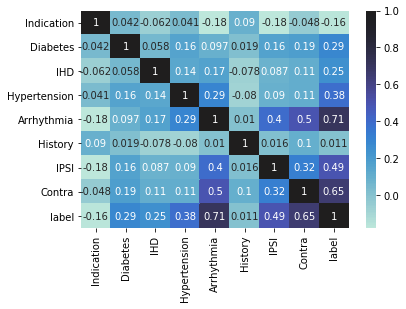

In [88]:
colcha = patients.corr(method = 'pearson')
sns.heatmap(colcha, center=1, annot = True, cbar = True)

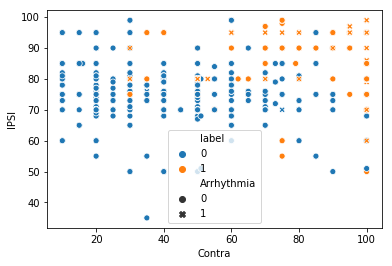

In [89]:
sns.scatterplot(x="Contra", y="IPSI", hue="label", style="Arrhythmia", data=patients)

# Logistic Regression

## Using White Box Model

In [90]:
from sklearn.linear_model import LogisticRegression

In [91]:
lr = LogisticRegression(max_iter = 50000, solver ='newton-cg')

In [92]:
lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=50000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [93]:
lr_acc = lr.score(x_test,y_test)*100
lr_acc

95.6140350877193

In [94]:
print_truth_table(lr)

Model: 1, Actual: 1
Model: 1, Actual: 1
Model: 1, Actual: 1
Model: 1, Actual: 1
Model: 1, Actual: 1
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 1, Actual: 0
Model: 1, Actual: 1
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 1, Actual: 1
Model: 1, Actual: 1
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 1, Actual: 1
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 1, Actual: 1
Model: 1, Actual: 1
Model: 1, Actual: 1
Model: 0, Actual: 0
Model: 1, Actual: 1
Model: 1, Actual: 1
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 1, Actual: 1
Model: 1, Actual: 1
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 1, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 1
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 1, Actual: 1
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 1, Actual: 1
Model: 0, Actual: 0
Model: 1, Actual: 1
Model: 1, Actual: 1
Model: 0, Actual: 0


In [95]:
truth_table_percentages(lr)

true_positives_lr = true_positives
true_negatives_lr = true_negatives
false_positives_lr = false_positives
false_negatives_lr = false_negatives
clr_tv()

Total Test Cases: 456


True Positives: 152     Percentage: 33.33333333333333%

False Positives: 7     Percentage: 1.5350877192982455%

True Negatives: 284    Percentage: 62.28070175438597%

False Negatives: 13     Percentage: 2.850877192982456%


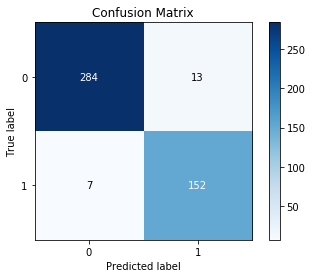

In [96]:
y_pred = lr.predict(x_test)
skplt.metrics.plot_confusion_matrix(y_test, y_pred)

# MLP

## Using White Box Model

In [97]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='adam', max_iter = 500000, hidden_layer_sizes = (10,12,14,19,21,10), random_state = 12, shuffle = False)
mlp.fit(x_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 12, 14, 19, 21, 10),
              learning_rate='constant', learning_rate_init=0.001, max_fun=15000,
              max_iter=500000, momentum=0.9, n_iter_no_change=10,
              nesterovs_momentum=True, power_t=0.5, random_state=12,
              shuffle=False, solver='adam', tol=0.0001, validation_fraction=0.1,
              verbose=False, warm_start=False)

In [98]:
mlp_acc = mlp.score(x_test,y_test)*100
mlp_acc

96.05263157894737

In [99]:
print_truth_table(mlp)

Model: 1, Actual: 1
Model: 1, Actual: 1
Model: 1, Actual: 1
Model: 1, Actual: 1
Model: 1, Actual: 1
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 1, Actual: 1
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 1, Actual: 1
Model: 1, Actual: 1
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 1, Actual: 1
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 1, Actual: 1
Model: 1, Actual: 1
Model: 1, Actual: 1
Model: 0, Actual: 0
Model: 1, Actual: 1
Model: 1, Actual: 1
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 1, Actual: 1
Model: 1, Actual: 1
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 1
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 1, Actual: 1
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 1, Actual: 1
Model: 0, Actual: 0
Model: 1, Actual: 1
Model: 1, Actual: 1
Model: 0, Actual: 0


In [100]:
truth_table_percentages(mlp)

true_positives_mlp = true_positives
true_negatives_mlp = true_negatives
false_positives_mlp = false_positives
false_negatives_mlp = false_negatives
clr_tv()

Total Test Cases: 456


True Positives: 143     Percentage: 31.359649122807014%

False Positives: 16     Percentage: 3.508771929824561%

True Negatives: 295    Percentage: 64.69298245614034%

False Negatives: 2     Percentage: 0.43859649122807015%


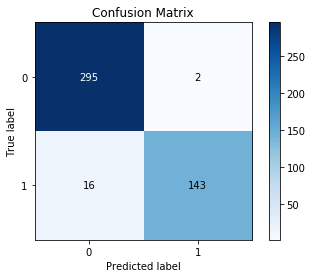

In [101]:
y_pred = mlp.predict(x_test)
skplt.metrics.plot_confusion_matrix(y_test, y_pred)

# KNN

## Using White Box Model

In [102]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5,)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [103]:
knn_acc = knn.score(x_test,y_test)*100
knn_acc

93.2017543859649

In [104]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[295   2]
 [ 16 143]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       297
           1       0.99      0.90      0.94       159

    accuracy                           0.96       456
   macro avg       0.97      0.95      0.96       456
weighted avg       0.96      0.96      0.96       456



In [105]:
print_truth_table(knn)

Model: 1, Actual: 1
Model: 1, Actual: 1
Model: 1, Actual: 1
Model: 1, Actual: 1
Model: 1, Actual: 1
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 1
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 1, Actual: 1
Model: 1, Actual: 1
Model: 1, Actual: 0
Model: 0, Actual: 0
Model: 1, Actual: 1
Model: 0, Actual: 0
Model: 1, Actual: 0
Model: 1, Actual: 1
Model: 1, Actual: 1
Model: 1, Actual: 1
Model: 0, Actual: 0
Model: 1, Actual: 1
Model: 1, Actual: 1
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 1, Actual: 1
Model: 1, Actual: 1
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 1
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 1, Actual: 1
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 1, Actual: 1
Model: 0, Actual: 0
Model: 1, Actual: 1
Model: 1, Actual: 1
Model: 0, Actual: 0


In [106]:
truth_table_percentages(knn)

true_positives_knn = true_positives
true_negatives_knn = true_negatives
false_positives_knn = false_positives
false_negatives_knn = false_negatives
clr_tv()

Total Test Cases: 456


True Positives: 143     Percentage: 31.359649122807014%

False Positives: 16     Percentage: 3.508771929824561%

True Negatives: 282    Percentage: 61.8421052631579%

False Negatives: 15     Percentage: 3.289473684210526%


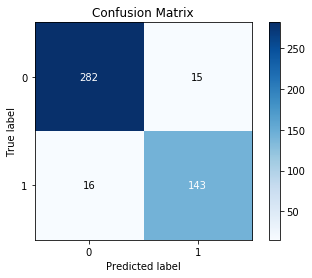

In [107]:
y_pred = knn.predict(x_test)
skplt.metrics.plot_confusion_matrix(y_test, y_pred)

# Decision Tree Classifier 

## Using White Box Model

In [108]:
from sklearn.tree import DecisionTreeClassifier 
dt = DecisionTreeClassifier(max_depth=9)
dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [109]:
dt_acc = dt.score(x_test,y_test)*100
dt_acc

98.68421052631578

In [110]:
print_truth_table(dt)

Model: 1, Actual: 1
Model: 1, Actual: 1
Model: 1, Actual: 1
Model: 1, Actual: 1
Model: 1, Actual: 1
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 1, Actual: 1
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 1, Actual: 1
Model: 1, Actual: 1
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 1, Actual: 1
Model: 1, Actual: 0
Model: 0, Actual: 0
Model: 1, Actual: 1
Model: 1, Actual: 1
Model: 1, Actual: 1
Model: 0, Actual: 0
Model: 1, Actual: 1
Model: 1, Actual: 1
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 1, Actual: 1
Model: 1, Actual: 1
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 1, Actual: 1
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 1, Actual: 1
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 1, Actual: 1
Model: 0, Actual: 0
Model: 1, Actual: 1
Model: 1, Actual: 1
Model: 0, Actual: 0


In [111]:
truth_table_percentages(dt)

true_positives_dt = true_positives
true_negatives_dt = true_negatives
false_positives_dt = false_positives
false_negatives_dt = false_negatives
clr_tv()

Total Test Cases: 456


True Positives: 156     Percentage: 34.21052631578947%

False Positives: 3     Percentage: 0.6578947368421052%

True Negatives: 294    Percentage: 64.47368421052632%

False Negatives: 3     Percentage: 0.6578947368421052%


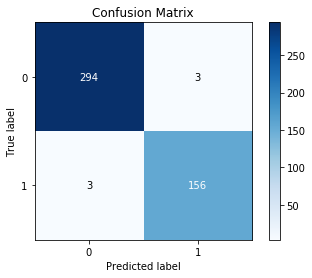

In [112]:
y_pred = dt.predict(x_test)
skplt.metrics.plot_confusion_matrix(y_test, y_pred)

# Black Box Model (KNN)

The temp_knn dataframe will be cleaned using the knn classifier. As the resoning behind the predictions the classifier makes are not transparent; and the influencial variables are not known, it is known as a black box model.

# Save unspecified values in dataframe

In [113]:
#For the knn black box model, a new dataframe copy is created
#from the original csv file
temp = data.copy()
patients_knn = temp.copy()
temp.drop(temp.columns[[0, 1]], axis = 1, inplace = True)

In [114]:
#All the null values in the dataframe must be saved into another data frame
#The KNN model will be trained on a data set without the null values
#then the model will be used to fill in the null and empty values
knn_df = temp[(temp.Indication.isnull())|(temp.Diabetes.isnull())|(temp.IHD.isnull())|(temp.Hypertension.isnull())|(temp.Arrhythmia.isnull())|(temp.History.isnull())|(temp.IPSI.isnull())|(temp.Contra == ' ')|(temp.label == 'Unknown')|(temp.label.isnull())]
knn_df

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
201,CVA,yes,no,NaN,yes,no,95.0,90,Risk
337,CVA,no,yes,no,no,NaN,85.0,50,NoRisk
442,NaN,no,yes,yes,no,no,70.0,40,NoRisk
447,CVA,NaN,yes,yes,yes,no,90.0,100,Risk
453,ASx,no,no,yes,no,no,70.0,,NoRisk
475,ASx,no,yes,yes,no,no,70.0,55,Unknown
514,A-F,NaN,no,yes,no,no,80.0,40,NoRisk
523,CVA,no,no,yes,yes,no,95.0,100,Unknown
590,A-F,no,no,NaN,no,no,78.0,30,NoRisk
620,A-F,no,no,no,no,no,NaN,100,Risk


In [115]:
#cheking for null values in empty data frame used for training KNN classifier
temp_knn = temp.dropna()
temp_knn.isnull().sum()

Indication      0
Diabetes        0
IHD             0
Hypertension    0
Arrhythmia      0
History         0
IPSI            0
Contra          0
label           0
dtype: int64

In [116]:
# Remove unspecified values from main black box temp_knn dataframe to allow for training 
ListRandom = []
counter = 0
temp_knn.reset_index()
for index, row in temp_knn.iterrows():
    if row['Contra'] == ' ' or row['label'] == 'Unknown':
        print(index, row)
        temp_knn = temp_knn.drop(index)
        ListRandom.append(index)
        
for index, row in temp_knn.iterrows():
    if index in ListRandom:
        temp_knn = temp_knn.drop(index)
        counter = counter + 1

print(counter)


453 Indication         ASx
Diabetes            no
IHD                 no
Hypertension       yes
Arrhythmia          no
History             no
IPSI                70
Contra                
label           NoRisk
Name: 453, dtype: object
475 Indication          ASx
Diabetes             no
IHD                 yes
Hypertension        yes
Arrhythmia           no
History              no
IPSI                 70
Contra               55
label           Unknown
Name: 475, dtype: object
523 Indication          CVA
Diabetes             no
IHD                  no
Hypertension        yes
Arrhythmia          yes
History              no
IPSI                 95
Contra              100
label           Unknown
Name: 523, dtype: object
0


In [117]:
#Fixing Asx and ASx to ASX 
count = 0
for index, row in temp_knn.iterrows():
    if ((temp_knn.at[index, 'Indication'] == 'Asx') | (temp_knn.at[index,'Indication'] == 'ASx')):
        temp_knn.at[index, 'Indication'] = 'ASX'
        count+=1

print(count)
    

216


In [118]:
#Fixing Asx and ASx to ASX 
count = 0
for index, row in knn_df.iterrows():
    if ((knn_df.at[index, 'Indication'] == 'Asx') | (knn_df.at[index,'Indication'] == 'ASx')):
        knn_df.at[index, 'Indication'] = 'ASX'
        count+=1

print(count)

2


In [119]:
#Fixing Asx and ASx to ASX 
count = 0
for index, row in patients_knn.iterrows():
    if ((patients_knn.at[index, 'Indication'] == 'Asx') | (patients_knn.at[index,'Indication'] == 'ASx')):
        patients_knn.at[index, 'Indication'] = 'ASX'
        count+=1

print(count)

218


# Data Type Mapping & Conversion

CREATE INTEGERS OF YES AND NO, RISK AND NORISK, AND INDICATION

In [120]:
#Saving enums to data frame for knn_df, temp and patients_knn 
#dataframe and null value dataframe 
patients_knn['Indication'] = patients_knn['Indication'].map(Indication_map)
patients_knn['Diabetes'] = patients_knn['Diabetes'].map(Yes_No_map)
patients_knn['IHD'] = patients_knn['IHD'].map(Yes_No_map)
patients_knn['Hypertension'] = patients_knn['Hypertension'].map(Yes_No_map)
patients_knn['Arrhythmia'] = patients_knn['Arrhythmia'].map(Yes_No_map)
patients_knn['History'] = patients_knn['History'].map(Yes_No_map)
patients_knn['label'] = patients_knn['label'].map(label_map)

knn_df['Indication'] = knn_df['Indication'].map(Indication_map)
knn_df['Diabetes'] = knn_df['Diabetes'].map(Yes_No_map)
knn_df['IHD'] = knn_df['IHD'].map(Yes_No_map)
knn_df['Hypertension'] = knn_df['Hypertension'].map(Yes_No_map)
knn_df['Arrhythmia'] = knn_df['Arrhythmia'].map(Yes_No_map)
knn_df['History'] = knn_df['History'].map(Yes_No_map)
knn_df['label'] = knn_df['label'].map(label_map)

temp_knn['Indication'] = temp_knn['Indication'].map(Indication_map)
temp_knn['Diabetes'] = temp_knn['Diabetes'].map(Yes_No_map)
temp_knn['IHD'] = temp_knn['IHD'].map(Yes_No_map)
temp_knn['Hypertension'] = temp_knn['Hypertension'].map(Yes_No_map)
temp_knn['Arrhythmia'] = temp_knn['Arrhythmia'].map(Yes_No_map)
temp_knn['History'] = temp_knn['History'].map(Yes_No_map)
temp_knn['label'] = temp_knn['label'].map(label_map)

#Data now enumerated and can be used by models
#patients_knn = patients_knn.dropna()

c:\users\onayo\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
c:\users\onayo\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
c:\users\onayo\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be s

In [121]:
temp_knn['Contra'] = pd.to_numeric(temp_knn['Contra'])
temp_knn['IPSI'] = temp_knn['IPSI'].astype(int)
#Contra converted from type object to int64
patients_knn.dtypes

Random          float64
Id                int64
Indication      float64
Diabetes        float64
IHD               int64
Hypertension    float64
Arrhythmia        int64
History         float64
IPSI            float64
Contra           object
label           float64
dtype: object

# Checking for remaining unspecified values

In [122]:
temp_knn.isnull().sum()

Indication      0
Diabetes        0
IHD             0
Hypertension    0
Arrhythmia      0
History         0
IPSI            0
Contra          0
label           0
dtype: int64

In [123]:
temp_knn[(temp_knn.Indication.isnull())|(temp_knn.Diabetes.isnull())|(temp_knn.IHD.isnull())|(temp_knn.Hypertension.isnull())|(temp_knn.Arrhythmia.isnull())|(temp_knn.History.isnull())|(temp_knn.IPSI.isnull())|(temp_knn.Contra == ' ')|(temp_knn.label == 'Unknown')|(temp_knn.label.isnull())]

c:\users\onayo\appdata\local\programs\python\python37\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label


# Visualised Analysis of Data Before Cleaning 

In [124]:
patients_knn.drop('Random', axis = 1, inplace = True)
patients_knn.drop('Id', axis = 1, inplace = True)

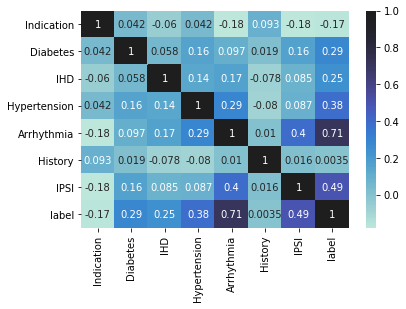

In [125]:
colcha = patients_knn.corr(method = 'pearson')
sns.heatmap(colcha, center=1, annot = True, cbar = True)

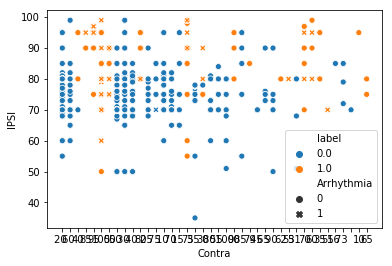

In [126]:
sns.scatterplot(x="Contra", y="IPSI", hue="label", style="Arrhythmia", data=patients_knn)

# Prepare Data 

In [127]:
#temp_knn used for training KNN classifier

#patients_knn will be the df cleaned by KNN and for training the other models

#knn_df used to contain null values for referencing in the cleaning process

In [128]:
#Data is split into test and train 
knn_df.reset_index()
x = temp_knn.drop("Indication", axis = 1).values
y = temp_knn["Indication"].values
     
from sklearn.model_selection import train_test_split

#30% tesst 70% train
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=ts)
     
x_test = x_test.astype('int')
x_train = x_train.astype('int')
y_test = y_test.astype('int')
y_train = y_train.astype('int')

In [129]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [130]:
#Knn trained to fill in the null values
knn.score(x_test,y_test)

0.6711111111111111

# Cleaning null values with KNN

In [131]:
patients_knn

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
0,1.0,0.0,0,1.0,0,0.0,78.0,20,0.0
1,4.0,0.0,0,0.0,0,0.0,70.0,60,0.0
2,1.0,0.0,1,1.0,0,0.0,95.0,40,1.0
3,4.0,0.0,0,1.0,0,0.0,90.0,85,1.0
4,2.0,0.0,0,0.0,0,0.0,70.0,20,0.0
...,...,...,...,...,...,...,...,...,...
1515,1.0,0.0,1,0.0,0,0.0,76.0,60,0.0
1516,1.0,0.0,0,1.0,1,0.0,90.0,75,1.0
1517,4.0,0.0,0,1.0,0,0.0,75.0,20,0.0
1518,1.0,0.0,1,0.0,0,0.0,70.0,45,0.0


In [132]:
knn_df.reset_index()

,index,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
0,201,2.0,1.0,0,NaN,1,0.0,95.0,90,1.0
1,337,2.0,0.0,1,0.0,0,NaN,85.0,50,0.0
2,442,NaN,0.0,1,1.0,0,0.0,70.0,40,0.0
3,447,2.0,NaN,1,1.0,1,0.0,90.0,100,1.0
4,453,3.0,0.0,0,1.0,0,0.0,70.0,,0.0
5,475,3.0,0.0,1,1.0,0,0.0,70.0,55,NaN
6,514,1.0,NaN,0,1.0,0,0.0,80.0,40,0.0
7,523,2.0,0.0,0,1.0,1,0.0,95.0,100,NaN
8,590,1.0,0.0,0,NaN,0,0.0,78.0,30,0.0
9,620,1.0,0.0,0,0.0,0,0.0,NaN,100,1.0


In [133]:
knn_df.dtypes

Indication      float64
Diabetes        float64
IHD               int64
Hypertension    float64
Arrhythmia        int64
History         float64
IPSI            float64
Contra           object
label           float64
dtype: object

# Indication

## Record 442

In [134]:
patients_knn[442:443] #Record containing null value from main knn df

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
442,NaN,0.0,1,1.0,0,0.0,70.0,40,0.0


In [135]:
knn_Indication = knn_df[2:3] #Record containing null value from null value df
knn_Indication = knn_Indication.drop("Indication", axis = 1) #Remove attribute needed for prediction.
knn_Indication #Attribute removed

,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
442,0.0,1,1.0,0,0.0,70.0,40,0.0


In [136]:
p = knn.predict(knn_Indication) #Predicted value saved to variable p
k = patients_knn[442:443] #Grab record with null value from main knn df
k['Indication'] = p #Place predicted value in location of null value
patients_knn[442:443] = k #Replace record with appended record 
patients_knn[442:443] #Null value imputed 

c:\users\onayo\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
442,1.0,0.0,1,1.0,0,0.0,70.0,40,0.0


## Record 822

In [137]:
patients_knn[822:823]

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
822,NaN,0.0,1,0.0,0,0.0,80.0,100,1.0


In [138]:
knn_Indication = knn_df[13:14]
knn_Indication = knn_Indication.drop("Indication", axis = 1)
knn_Indication

,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
822,0.0,1,0.0,0,0.0,80.0,100,1.0


In [139]:
p = knn.predict(knn_Indication)
k = patients_knn[822:823]
k['Indication'] = p
patients_knn[822:823] = k
patients_knn[822:823]

c:\users\onayo\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
822,4.0,0.0,1,0.0,0,0.0,80.0,100,1.0


## Record 1007

In [140]:
patients_knn[1007:1008] 

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
1007,NaN,0.0,0,0.0,1,1.0,99.0,100,1.0


In [141]:
knn_Indication = knn_df[18:19]
knn_Indication = knn_Indication.drop("Indication", axis = 1)
knn_Indication

,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
1007,0.0,0,0.0,1,1.0,99.0,100,1.0


In [142]:
p = knn.predict(knn_Indication)
k = patients_knn[1007:1008] 
k['Indication'] = p
patients_knn[1007:1008]  = k
patients_knn[1007:1008] 

c:\users\onayo\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
1007,2.0,0.0,0,0.0,1,1.0,99.0,100,1.0


# Diabetes 

In [143]:
#Data is split into test and train 
knn_df.reset_index()
x = temp_knn.drop("Diabetes", axis = 1).values
y = temp_knn["Diabetes"].values
     
from sklearn.model_selection import train_test_split

#30% tesst 70% train
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=ts)
     
x_test = x_test.astype('int')
x_train = x_train.astype('int')
y_test = y_test.astype('int')
y_train = y_train.astype('int')

In [144]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [145]:
knn.score(x_test,y_test)

0.9644444444444444

## Record 447

In [146]:
patients_knn[447:448] 

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
447,2.0,NaN,1,1.0,1,0.0,90.0,100,1.0


In [147]:
knn_Diabetes = knn_df[3:4]
knn_Diabetes = knn_Diabetes.drop("Diabetes", axis = 1)
knn_Diabetes

,Indication,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
447,2.0,1,1.0,1,0.0,90.0,100,1.0


In [148]:
p = knn.predict(knn_Diabetes)
k = patients_knn[447:448] 
k['Diabetes'] = p
patients_knn[447:448]  = k
patients_knn[447:448] 

c:\users\onayo\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
447,2.0,0.0,1,1.0,1,0.0,90.0,100,1.0


## Record 514

In [149]:
patients_knn[514:515] 

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
514,1.0,NaN,0,1.0,0,0.0,80.0,40,0.0


In [150]:
knn_Diabetes = knn_df[6:7]
knn_Diabetes = knn_Diabetes.drop("Diabetes", axis = 1)
knn_Diabetes

,Indication,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
514,1.0,0,1.0,0,0.0,80.0,40,0.0


In [151]:
p = knn.predict(knn_Diabetes)
k = patients_knn[514:515] 
k['Diabetes'] = p
patients_knn[514:515]   = k
patients_knn[514:515]  

c:\users\onayo\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
514,1.0,0.0,0,1.0,0,0.0,80.0,40,0.0


# Hypertension

In [152]:
#Data is split into test and train 
knn_df.reset_index()
x = temp_knn.drop("Hypertension", axis = 1).values
y = temp_knn["Hypertension"].values
     
from sklearn.model_selection import train_test_split

#30% tesst 70% train
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=ts)
     
x_test = x_test.astype('int')
x_train = x_train.astype('int')
y_test = y_test.astype('int')
y_train = y_train.astype('int')

In [153]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [154]:
knn.score(x_test,y_test)

0.7955555555555556

## Record 201

In [155]:
patients_knn[201:202] 

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
201,2.0,1.0,0,NaN,1,0.0,95.0,90,1.0


In [156]:
knn_Hypertension = knn_df[0:1]
knn_Hypertension = knn_Hypertension.drop("Hypertension", axis = 1)
knn_Hypertension

,Indication,Diabetes,IHD,Arrhythmia,History,IPSI,Contra,label
201,2.0,1.0,0,1,0.0,95.0,90,1.0


In [157]:
p = knn.predict(knn_Hypertension)
k = patients_knn[201:202] 
k['Hypertension'] = p
patients_knn[201:202] = k
patients_knn[201:202]  

c:\users\onayo\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
201,2.0,1.0,0,0.0,1,0.0,95.0,90,1.0


## Record 590

In [158]:
patients_knn[590:591] 

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
590,1.0,0.0,0,NaN,0,0.0,78.0,30,0.0


In [159]:
knn_Hypertension = knn_df[8:9]
knn_Hypertension = knn_Hypertension.drop("Hypertension", axis = 1)
knn_Hypertension

,Indication,Diabetes,IHD,Arrhythmia,History,IPSI,Contra,label
590,1.0,0.0,0,0,0.0,78.0,30,0.0


In [160]:
p = knn.predict(knn_Hypertension)
k = patients_knn[590:591] 
k['Hypertension'] = p
patients_knn[590:591]   = k
patients_knn[590:591] 

c:\users\onayo\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
590,1.0,0.0,0,0.0,0,0.0,78.0,30,0.0


## Record 983

In [161]:
patients_knn[983:984] 

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
983,4.0,0.0,0,NaN,0,0.0,75.0,75,0.0


In [162]:
knn_Hypertension = knn_df[17:18]
knn_Hypertension = knn_Hypertension.drop("Hypertension", axis = 1)
knn_Hypertension

,Indication,Diabetes,IHD,Arrhythmia,History,IPSI,Contra,label
983,4.0,0.0,0,0,0.0,75.0,75,0.0


In [163]:
p = knn.predict(knn_Hypertension)
k = patients_knn[983:984] 
k['Hypertension'] = p
patients_knn[983:984] = k
patients_knn[983:984]  

c:\users\onayo\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
983,4.0,0.0,0,0.0,0,0.0,75.0,75,0.0


# History

In [164]:
#Data is split into test and train 
knn_df.reset_index()
x = temp_knn.drop("History", axis = 1).values
y = temp_knn["History"].values
     
from sklearn.model_selection import train_test_split

#30% tesst 70% train
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=ts)
     
x_test = x_test.astype('int')
x_train = x_train.astype('int')
y_test = y_test.astype('int')
y_train = y_train.astype('int')

In [165]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [166]:
knn.score(x_test,y_test)

0.9888888888888889

## Record 337

In [167]:
patients_knn[337:338] 

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
337,2.0,0.0,1,0.0,0,NaN,85.0,50,0.0


In [168]:
knn_History = knn_df[1:2]
knn_History = knn_History.drop("History", axis = 1)
knn_History

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,IPSI,Contra,label
337,2.0,0.0,1,0.0,0,85.0,50,0.0


In [169]:
p = knn.predict(knn_History)
k = patients_knn[337:338]  
k['History'] = p
patients_knn[337:338] = k
patients_knn[337:338] 

c:\users\onayo\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
337,2.0,0.0,1,0.0,0,0.0,85.0,50,0.0


## Record 784

In [170]:
patients_knn[784:785]

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
784,2.0,0.0,0,1.0,1,NaN,95.0,100,1.0


In [171]:
knn_History = knn_df[11:12]
knn_History = knn_History.drop("History", axis = 1)
knn_History

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,IPSI,Contra,label
784,2.0,0.0,0,1.0,1,95.0,100,1.0


In [172]:
p = knn.predict(knn_History)
k = patients_knn[784:785] 
k['History'] = p
patients_knn[784:785] = k
patients_knn[784:785] 

c:\users\onayo\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
784,2.0,0.0,0,1.0,1,0.0,95.0,100,1.0


# IPSI

In [173]:
#Data is split into test and train 
knn_df.reset_index()
x = temp_knn.drop("IPSI", axis = 1).values
y = temp_knn["IPSI"].values
     
from sklearn.model_selection import train_test_split

#30% tesst 70% train
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=ts)
     
x_test = x_test.astype('int')
x_train = x_train.astype('int')
y_test = y_test.astype('int')
y_train = y_train.astype('int')

In [174]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [175]:
knn.score(x_test,y_test)

0.4222222222222222

## Record 620

In [176]:
patients_knn[620:621]

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
620,1.0,0.0,0,0.0,0,0.0,NaN,100,1.0


In [177]:
knn_IPSI = knn_df[9:10]
knn_IPSI = knn_IPSI.drop("IPSI", axis = 1)
knn_IPSI

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,Contra,label
620,1.0,0.0,0,0.0,0,0.0,100,1.0


In [178]:
p = knn.predict(knn_IPSI)
k = patients_knn[620:621] 
k['IPSI'] = p
patients_knn[620:621] = k
patients_knn[620:621] 

c:\users\onayo\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
620,1.0,0.0,0,0.0,0,0.0,80.0,100,1.0


## Record 752

In [179]:
patients_knn[752:753]

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
752,2.0,0.0,1,1.0,1,0.0,NaN,100,1.0


In [180]:
knn_IPSI = knn_df[10:11]
knn_IPSI = knn_IPSI.drop("IPSI", axis = 1)
knn_IPSI

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,Contra,label
752,2.0,0.0,1,1.0,1,0.0,100,1.0


In [181]:
p = knn.predict(knn_IPSI)
k = patients_knn[752:753] 
k['IPSI'] = p
patients_knn[752:753] = k
patients_knn[752:753] 

c:\users\onayo\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
752,2.0,0.0,1,1.0,1,0.0,70.0,100,1.0


## Record 845

In [182]:
patients_knn[845:846]

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
845,2.0,0.0,0,0.0,0,0.0,NaN,20,0.0


In [183]:
knn_IPSI = knn_df[14:15]
knn_IPSI = knn_IPSI.drop("IPSI", axis = 1)
knn_IPSI

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,Contra,label
845,2.0,0.0,0,0.0,0,0.0,20,0.0


In [184]:
p = knn.predict(knn_IPSI)
k = patients_knn[845:846]
k['IPSI'] = p
patients_knn[845:846] = k
patients_knn[845:846] 

c:\users\onayo\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
845,2.0,0.0,0,0.0,0,0.0,60.0,20,0.0


## Record 916

In [185]:
patients_knn[916:917]

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
916,1.0,0.0,0,0.0,0,0.0,NaN,50,0.0


In [186]:
knn_IPSI = knn_df[15:16]
knn_IPSI = knn_IPSI.drop("IPSI", axis = 1)
knn_IPSI

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,Contra,label
916,1.0,0.0,0,0.0,0,0.0,50,0.0


In [187]:
p = knn.predict(knn_IPSI)
k = patients_knn[916:917]
k['IPSI'] = p
patients_knn[916:917] = k
patients_knn[916:917] 

c:\users\onayo\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
916,1.0,0.0,0,0.0,0,0.0,74.0,50,0.0


# Contra

In [188]:
#Data is split into test and train 
knn_df.reset_index()
x = temp_knn.drop("Contra", axis = 1).values
y = temp_knn["Contra"].values
     
from sklearn.model_selection import train_test_split

#30% tesst 70% train
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=ts)
     
x_test = x_test.astype('int')
x_train = x_train.astype('int')
y_test = y_test.astype('int')
y_train = y_train.astype('int')

In [189]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [190]:
knn.score(x_test,y_test)

0.4822222222222222

## Record 453

In [191]:
patients_knn[453:454]

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
453,3.0,0.0,0,1.0,0,0.0,70.0,,0.0


In [192]:
knn_Contra = knn_df[4:5]
knn_Contra = knn_Contra.drop("Contra", axis = 1)
knn_Contra

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,label
453,3.0,0.0,0,1.0,0,0.0,70.0,0.0


In [193]:
p = knn.predict(knn_Contra)
k = patients_knn[453:454]
k['Contra'] = p
patients_knn[453:454] = k
patients_knn[453:454] 

c:\users\onayo\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
453,3.0,0.0,0,1.0,0,0.0,70.0,60,0.0


# label

In [194]:
#Data is split into test and train 
knn_df.reset_index()
x = temp_knn.drop("label", axis = 1).values
y = temp_knn["label"].values
     
from sklearn.model_selection import train_test_split

#30% tesst 70% train
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=ts)
     
x_test = x_test.astype('int')
x_train = x_train.astype('int')
y_test = y_test.astype('int')
y_train = y_train.astype('int')

In [195]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [196]:
knn.score(x_test,y_test)

0.94

## Record 475

In [197]:
patients_knn[475:476]

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
475,3.0,0.0,1,1.0,0,0.0,70.0,55,NaN


In [198]:
knn_label = knn_df[5:6]
knn_label = knn_label.drop("label", axis = 1)
knn_label

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra
475,3.0,0.0,1,1.0,0,0.0,70.0,55


In [199]:
p = knn.predict(knn_label)
k = patients_knn[475:476]
k['label'] = p
patients_knn[475:476] = k
patients_knn[475:476] 

c:\users\onayo\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
475,3.0,0.0,1,1.0,0,0.0,70.0,55,1.0


## Record 523

In [200]:
patients_knn[523:524]

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
523,2.0,0.0,0,1.0,1,0.0,95.0,100,NaN


In [201]:
knn_label = knn_df[7:8]
knn_label = knn_label.drop("label", axis = 1)
knn_label

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra
523,2.0,0.0,0,1.0,1,0.0,95.0,100


In [202]:
p = knn.predict(knn_label)
k = patients_knn[523:524]
k['label'] = p
patients_knn[523:524] = k
patients_knn[523:524] 

c:\users\onayo\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
523,2.0,0.0,0,1.0,1,0.0,95.0,100,1.0


## Record 812

In [203]:
patients_knn[812:813]

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
812,2.0,0.0,1,1.0,0,0.0,76.0,50,NaN


In [204]:
knn_label = knn_df[12:13]
knn_label = knn_label.drop("label", axis = 1)
knn_label

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra
812,2.0,0.0,1,1.0,0,0.0,76.0,50


In [205]:
p = knn.predict(knn_label)
k = patients_knn[812:813]
k['label'] = p
patients_knn[812:813] = k
patients_knn[812:813] 

c:\users\onayo\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
812,2.0,0.0,1,1.0,0,0.0,76.0,50,0.0


## Record 974

In [206]:
patients_knn[974:975]

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
974,2.0,0.0,1,1.0,1,0.0,80.0,70,NaN


In [207]:
knn_label = knn_df[16:17]
knn_label = knn_label.drop("label", axis = 1)
knn_label

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra
974,2.0,0.0,1,1.0,1,0.0,80.0,70


In [208]:
p = knn.predict(knn_label)
k = patients_knn[974:975]
k['label'] = p
patients_knn[974:975] = k
patients_knn[974:975] 

c:\users\onayo\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
974,2.0,0.0,1,1.0,1,0.0,80.0,70,0.0


## Record 1418

In [209]:
patients_knn[1418:1419]

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
1418,4.0,1.0,0,0.0,0,1.0,90.0,50,NaN


In [210]:
knn_label = knn_df[19:20]
knn_label = knn_label.drop("label", axis = 1)
knn_label

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra
1418,4.0,1.0,0,0.0,0,1.0,90.0,50


In [211]:
p = knn.predict(knn_label)
k = patients_knn[1418:1419]
k['label'] = p
patients_knn[1418:1419] = k
patients_knn[1418:1419] 

c:\users\onayo\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
1418,4.0,1.0,0,0.0,0,1.0,90.0,50,0.0


# Checking for remaining null or empty values 

In [212]:
patients_knn.isnull().sum()

Indication      0
Diabetes        0
IHD             0
Hypertension    0
Arrhythmia      0
History         0
IPSI            0
Contra          0
label           0
dtype: int64

In [213]:
patients_knn[(patients_knn.Indication.isnull())|(patients_knn.Diabetes.isnull())|(patients_knn.IHD.isnull())|(patients_knn.Hypertension.isnull())|(patients_knn.Arrhythmia.isnull())|(patients_knn.History.isnull())|(patients_knn.IPSI.isnull())|(patients_knn.Contra == ' ')|(patients_knn.label == 'Unknown')|(patients_knn.label.isnull())]

c:\users\onayo\appdata\local\programs\python\python37\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label


# Visualised Analysis of Data After Cleaning 

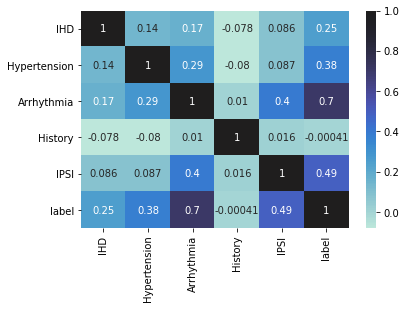

In [214]:
#Dropping Random and Id columns as they do not contribute to 
#predicting Risk or NoRisk
patients_knn.drop(patients_knn.columns[[0, 1]], axis = 1, inplace = True)
patients_knn
colcha = patients_knn.corr(method = 'pearson')
sns.heatmap(colcha, center=1, annot = True, cbar = True)

# Prepare for modeling

In [215]:
#Shuffling the data frame can help to avoid bias's when traning 
#When traning different models, suffle the same data frame once 
#Insures a fair test when traning the different models
patients_knn = sklearn.utils.shuffle(patients_knn)

In [216]:
patients_knn = sklearn.utils.shuffle(patients_knn)

In [217]:
#Data is split into test and train 
knn_df.reset_index()
x = patients_knn.drop("label", axis = 1).values
y = patients_knn["label"].values

#30% tesst 70% train
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=ts)
     
x_test = x_test.astype('int')
x_train = x_train.astype('int')
y_test = y_test.astype('int')
y_train = y_train.astype('int')

In [218]:
#Making sure Contra is a numeric data type to comply with the modles training requirements
patients_knn.dtypes

IHD               int64
Hypertension    float64
Arrhythmia        int64
History         float64
IPSI            float64
Contra           object
label           float64
dtype: object

In [219]:
patients_knn['Contra'] = pd.to_numeric(patients_knn['Contra'])

In [220]:
patients_knn.dtypes

IHD               int64
Hypertension    float64
Arrhythmia        int64
History         float64
IPSI            float64
Contra            int64
label           float64
dtype: object

# Logistic Regression

## Using Black Box Model (KNN) 

In [221]:
lr_knn = lr 

In [222]:
lr_knn.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=50000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [223]:
lr_knn_acc = lr_knn.score(x_test,y_test)*100
lr_knn_acc

94.2982456140351

In [224]:
print_truth_table(lr)

Model: 1, Actual: 1
Model: 1, Actual: 1
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 1, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 1, Actual: 1
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 1, Actual: 1
Model: 0, Actual: 0
Model: 1, Actual: 1
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 1, Actual: 0
Model: 0, Actual: 0
Model: 1, Actual: 1
Model: 0, Actual: 0
Model: 1, Actual: 1
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 1, Actual: 1
Model: 1, Actual: 1
Model: 1, Actual: 1
Model: 0, Actual: 0
Model: 1, Actual: 1
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 1, Actual: 1
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 1, Actual: 0
Model: 0, Actual: 0
Model: 1, Actual: 1
Model: 1, Actual: 1
Model: 1, Actual: 1
Model: 0, Actual: 0
Model: 1, Actual: 1
Model: 1, Actual: 1
Model: 0, Actual: 0
Model: 0, Actual: 0


In [225]:
truth_table_percentages(lr_knn)

true_positives_lr_knn = true_positives
true_negatives_lr_knn = true_negatives
false_positives_lr_knn = false_positives
false_negatives_lr_knn = false_negatives
clr_tv()

Total Test Cases: 456


True Positives: 137     Percentage: 30.043859649122805%

False Positives: 12     Percentage: 2.631578947368421%

True Negatives: 293    Percentage: 64.25438596491229%

False Negatives: 14     Percentage: 3.070175438596491%


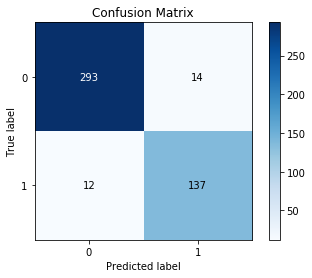

In [226]:
y_pred = lr_knn.predict(x_test)
e = skplt.metrics.plot_confusion_matrix(y_test, y_pred)
e

# MLP

## Using Black Box Model (KNN)

In [227]:
mlp_knn = mlp

In [228]:
mlp_knn.fit(x_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 12, 14, 19, 21, 10),
              learning_rate='constant', learning_rate_init=0.001, max_fun=15000,
              max_iter=500000, momentum=0.9, n_iter_no_change=10,
              nesterovs_momentum=True, power_t=0.5, random_state=12,
              shuffle=False, solver='adam', tol=0.0001, validation_fraction=0.1,
              verbose=False, warm_start=False)

In [229]:
mlp_knn_acc = mlp_knn.score(x_test,y_test)*100
mlp_knn_acc

94.2982456140351

In [230]:
print_truth_table(mlp_knn)

Model: 1, Actual: 1
Model: 1, Actual: 1
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 1, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 1, Actual: 1
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 1, Actual: 1
Model: 0, Actual: 0
Model: 1, Actual: 1
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 1, Actual: 1
Model: 0, Actual: 0
Model: 1, Actual: 1
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 1, Actual: 1
Model: 1, Actual: 1
Model: 1, Actual: 1
Model: 0, Actual: 0
Model: 1, Actual: 1
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 1, Actual: 1
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 1, Actual: 1
Model: 1, Actual: 1
Model: 1, Actual: 1
Model: 0, Actual: 0
Model: 1, Actual: 1
Model: 1, Actual: 1
Model: 0, Actual: 0
Model: 0, Actual: 0


In [231]:
truth_table_percentages(mlp_knn)

true_positives_mlp_knn = true_positives
true_negatives_mlp_knn = true_negatives
false_positives_mlp_knn = false_positives
false_negatives_mlp_knn = false_negatives
clr_tv()

Total Test Cases: 456


True Positives: 130     Percentage: 28.50877192982456%

False Positives: 19     Percentage: 4.166666666666666%

True Negatives: 300    Percentage: 65.78947368421053%

False Negatives: 7     Percentage: 1.5350877192982455%


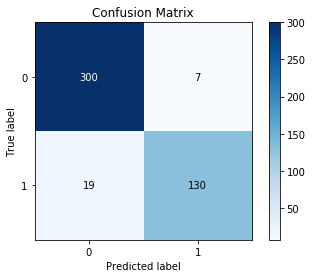

In [232]:
y_pred = mlp_knn.predict(x_test)
e = skplt.metrics.plot_confusion_matrix(y_test, y_pred)
e

# KNN

## Using Black Box Model (KNN) 

In [233]:
knn_knn = knn

In [234]:
knn_knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [235]:
knn_knn_acc = knn_knn.score(x_test,y_test)*100
knn_knn_acc

94.73684210526315

In [236]:
print_truth_table(knn_knn)

Model: 1, Actual: 1
Model: 1, Actual: 1
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 1, Actual: 0
Model: 1, Actual: 1
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 1, Actual: 1
Model: 0, Actual: 0
Model: 1, Actual: 1
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 1, Actual: 1
Model: 0, Actual: 0
Model: 1, Actual: 1
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 1, Actual: 1
Model: 1, Actual: 1
Model: 1, Actual: 1
Model: 0, Actual: 0
Model: 1, Actual: 1
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 1, Actual: 1
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 1, Actual: 1
Model: 1, Actual: 1
Model: 1, Actual: 1
Model: 0, Actual: 0
Model: 1, Actual: 1
Model: 1, Actual: 1
Model: 0, Actual: 0
Model: 0, Actual: 0


Model: 0, Actual: 0
Model: 1, Actual: 1
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 1, Actual: 1
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 1, Actual: 1
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 1, Actual: 1
Model: 1, Actual: 1
Model: 0, Actual: 0
Model: 1, Actual: 1
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 1, Actual: 1
Model: 1, Actual: 1
Model: 1, Actual: 1
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 1, Actual: 1


In [237]:
truth_table_percentages(knn_knn)

true_positives_knn_knn = true_positives
true_negatives_knn_knn = true_negatives
false_positives_knn_knn = false_positives
false_negatives_knn_knn = false_negatives
clr_tv()

Total Test Cases: 456


True Positives: 135     Percentage: 29.605263157894733%

False Positives: 14     Percentage: 3.070175438596491%

True Negatives: 297    Percentage: 65.13157894736842%

False Negatives: 10     Percentage: 2.1929824561403506%


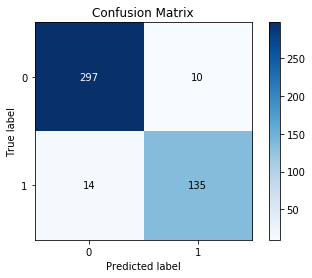

In [238]:
y_pred = knn_knn.predict(x_test)
e = skplt.metrics.plot_confusion_matrix(y_test, y_pred)
e

# Decision Tree Classifier

## Using Black Box Model (KNN)

In [239]:
dt_knn = dt

In [240]:
dt_knn.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [241]:
dt_knn_acc = dt_knn.score(x_test,y_test)*100
dt_knn_acc

97.36842105263158

In [242]:
print_truth_table(dt)

Model: 1, Actual: 1
Model: 1, Actual: 1
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 1, Actual: 1
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 1, Actual: 1
Model: 0, Actual: 0
Model: 1, Actual: 1
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 1, Actual: 1
Model: 0, Actual: 0
Model: 1, Actual: 1
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 1, Actual: 1
Model: 1, Actual: 1
Model: 1, Actual: 1
Model: 0, Actual: 0
Model: 1, Actual: 1
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 1, Actual: 1
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 0, Actual: 0
Model: 1, Actual: 1
Model: 1, Actual: 1
Model: 1, Actual: 1
Model: 0, Actual: 0
Model: 1, Actual: 1
Model: 1, Actual: 1
Model: 0, Actual: 0
Model: 0, Actual: 0


In [243]:
truth_table_percentages(dt_knn)

true_positives_dt_knn = true_positives
true_negatives_dt_knn = true_negatives
false_positives_dt_knn = false_positives
false_negatives_dt_knn = false_negatives
clr_tv()

Total Test Cases: 456


True Positives: 141     Percentage: 30.92105263157895%

False Positives: 8     Percentage: 1.7543859649122806%

True Negatives: 303    Percentage: 66.44736842105263%

False Negatives: 4     Percentage: 0.8771929824561403%


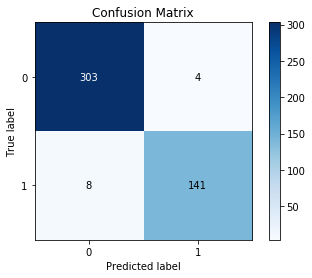

In [244]:
y_pred = dt_knn.predict(x_test)
skplt.metrics.plot_confusion_matrix(y_test, y_pred)

# Dataframe comparing KNN dataframe and White Box Model

In [245]:
#Sens - How often a model generates a positive result for cases that are actually positive
lr_sens = (true_positives_lr)/(true_positives_lr+false_negatives_lr)*100
mlp_sens = (true_positives_mlp)/(true_positives_mlp+false_negatives_mlp)*100
knn_sens = (true_positives_knn)/(true_positives_knn+false_negatives_knn)*100
dt_sens = (true_positives_dt)/(true_positives_dt+false_negatives_dt)*100

lr_sens_knn = (true_positives_lr_knn)/(true_positives_lr_knn+false_negatives_lr_knn)*100
mlp_sens_knn = (true_positives_mlp_knn)/(true_positives_mlp_knn+false_negatives_mlp_knn)*100
knn_sens_knn = (true_positives_knn_knn)/(true_positives_knn_knn+false_negatives_knn_knn)*100
dt_sens_knn = (true_positives_dt_knn)/(true_positives_dt_knn+false_negatives_dt_knn)*100

In [246]:
#Spec - How often a model correctly outputs negaative results that are actually negative
lr_spec = (true_negatives_lr)/(true_negatives_lr+false_positives_lr)*100
mlp_spec = (true_negatives_mlp)/(true_negatives_mlp+false_positives_mlp)*100
knn_spec = (true_negatives_knn)/(true_negatives_knn+false_positives_knn)*100
dt_spec = (true_negatives_dt)/(true_negatives_dt+false_positives_dt)*100

lr_spec_knn = (true_negatives_lr_knn)/(true_negatives_lr_knn+false_positives_lr_knn)*100
mlp_spec_knn = (true_negatives_mlp_knn)/(true_negatives_mlp_knn+false_positives_mlp_knn)*100
knn_spec_knn = (true_negatives_knn_knn)/(true_negatives_knn_knn+false_positives_knn_knn)*100
dt_spec_knn = (true_negatives_dt_knn)/(true_negatives_dt_knn+false_positives_dt_knn)*100

In [247]:
data = {'TP':[true_positives_lr, true_positives_mlp, true_positives_knn, true_positives_dt,true_positives_lr_knn, true_positives_mlp_knn, true_positives_knn_knn, true_positives_dt_knn], 
        'TN':[true_negatives_lr, true_negatives_mlp, true_negatives_knn, true_negatives_dt,true_negatives_lr_knn, true_negatives_mlp_knn, true_negatives_knn_knn, true_negatives_dt_knn], 
        'FP':[false_positives_lr,false_positives_mlp,false_positives_knn,false_positives_dt,false_positives_lr_knn, false_positives_mlp_knn, false_positives_knn_knn, false_positives_dt_knn], 
        'FN':[false_negatives_lr,false_negatives_mlp,false_negatives_knn,false_negatives_dt,false_negatives_lr_knn, false_negatives_mlp_knn, false_negatives_knn_knn, false_negatives_dt_knn],
        'Accuracy %':[lr_acc, mlp_acc, knn_acc, dt_acc, lr_knn_acc, mlp_knn_acc, knn_knn_acc, dt_knn_acc],
        'Sens%':[lr_sens, mlp_sens, knn_sens, dt_sens, lr_sens_knn, mlp_sens_knn, knn_sens_knn, dt_sens_knn],
        'Spec%':[lr_spec, mlp_spec, knn_spec, dt_spec, lr_spec_knn, mlp_spec_knn, knn_spec_knn, dt_spec_knn]}

In [248]:
df = pd.DataFrame(data, index =['Logistic Regression', 'MLP', 'KNN', 'Decision Tree',
                                'Logistic Regression (KNN)', 'MLP (KNN)', 'KNN (KNN)', 
                                'Decision Tree (KNN)'])

In [249]:
df # Classifier performance for different data frames

,TP,TN,FP,FN,Accuracy %,Sens%,Spec%
Logistic Regression,152,284,7,13,95.614035,92.121212,97.594502
MLP,143,295,16,2,96.052632,98.620690,94.855305
KNN,143,282,16,15,93.201754,90.506329,94.630872
Decision Tree,156,294,3,3,98.684211,98.113208,98.989899
Logistic Regression (KNN),137,293,12,14,94.298246,90.728477,96.065574
MLP (KNN),130,300,19,7,94.298246,94.890511,94.043887
KNN (KNN),135,297,14,10,94.736842,93.103448,95.498392
Decision Tree (KNN),141,303,8,4,97.368421,97.241379,97.427653


# Visual Analysis of Truth Table 

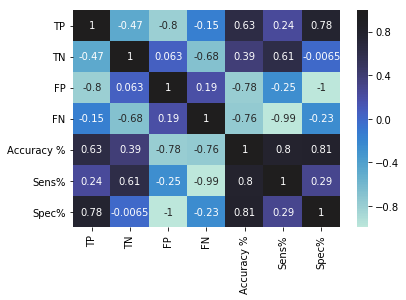

In [250]:
colcha = df.corr(method = 'pearson')
sns.heatmap(colcha, center=1, annot = True, cbar = True)

## Number of patients with Risk and NoRisk 

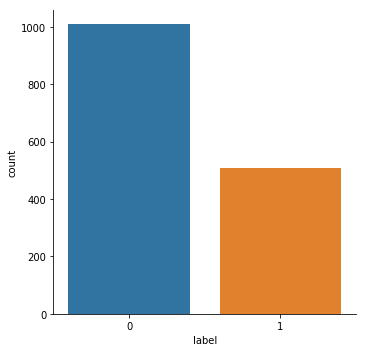

In [251]:
sns.catplot('label', data = patients, kind = "count")

## Comparing the what Indication is more likely to put a patient at risk

Indication       4.0
Diabetes         1.0
IHD              0.0
Hypertension     0.0
Arrhythmia       0.0
History          1.0
IPSI            90.0
Contra          50.0
label            0.0
dtype: float64


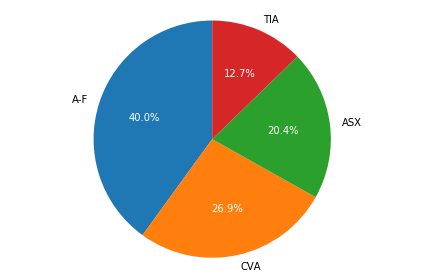

In [252]:
a = (patients["Indication"] == 1)  & (patients["label"] == 1)
b = (patients["Indication"] == 2)  & (patients["label"] == 1)
c = (patients["Indication"] == 3)  & (patients["label"] == 1)
d = (patients["Indication"] == 4)  & (patients["label"] == 1)
print(k.sum())

labels = 'A-F', 'CVA', 'ASX', 'TIA'
sizes = [ a.sum() , b.sum(), c.sum(), d.sum()]

patches, texts, autotexts = plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

for text in texts:
    text.set_color('black')
    
for autotext in autotexts:
    autotext.set_color('white')

plt.axis("equal")
plt.tight_layout()
plt.show()

## Comparing the what Indication is less likely to put a patient at risk

Indication       4.0
Diabetes         1.0
IHD              0.0
Hypertension     0.0
Arrhythmia       0.0
History          1.0
IPSI            90.0
Contra          50.0
label            0.0
dtype: float64


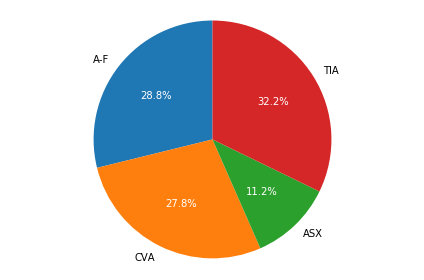

In [253]:
a = (patients["Indication"] == 1)  & (patients["label"] == 0)
b = (patients["Indication"] == 2)  & (patients["label"] == 0)
c = (patients["Indication"] == 3)  & (patients["label"] == 0)
d = (patients["Indication"] == 4)  & (patients["label"] == 0)
print(k.sum())

labels = 'A-F', 'CVA', 'ASX', 'TIA'
sizes = [ a.sum() , b.sum(), c.sum(), d.sum()]

patches, texts, autotexts = plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

for text in texts:
    text.set_color('black')
    
for autotext in autotexts:
    autotext.set_color('white')

plt.axis("equal")
plt.tight_layout()
plt.show()

## Comparing the what Indication is more likely to have Arrhythmia

Indication       4.0
Diabetes         1.0
IHD              0.0
Hypertension     0.0
Arrhythmia       0.0
History          1.0
IPSI            90.0
Contra          50.0
label            0.0
dtype: float64


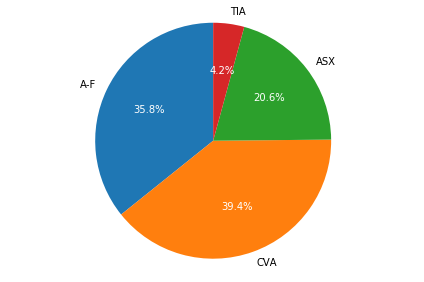

In [254]:
a = (patients["Indication"] == 1)  & (patients["Arrhythmia"] == 1)
b = (patients["Indication"] == 2)  & (patients["Arrhythmia"] == 1)
c = (patients["Indication"] == 3)  & (patients["Arrhythmia"] == 1)
d = (patients["Indication"] == 4)  & (patients["Arrhythmia"] == 1)
print(k.sum())

labels = 'A-F', 'CVA', 'ASX', 'TIA'
sizes = [ a.sum() , b.sum(), c.sum(), d.sum()]

patches, texts, autotexts = plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

for text in texts:
    text.set_color('black')
    
for autotext in autotexts:
    autotext.set_color('white')

plt.axis("equal")
plt.tight_layout()
plt.show()

## Comparing the what Indication is less likely to have Arrhythmia

Indication       4.0
Diabetes         1.0
IHD              0.0
Hypertension     0.0
Arrhythmia       0.0
History          1.0
IPSI            90.0
Contra          50.0
label            0.0
dtype: float64


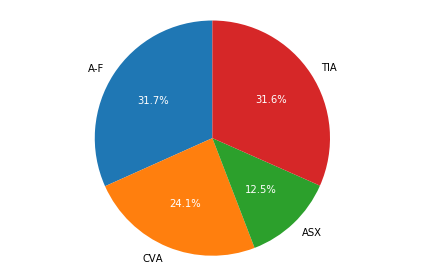

In [255]:
a = (patients["Indication"] == 1)  & (patients["Arrhythmia"] == 0)
b = (patients["Indication"] == 2)  & (patients["Arrhythmia"] == 0)
c = (patients["Indication"] == 3)  & (patients["Arrhythmia"] == 0)
d = (patients["Indication"] == 4)  & (patients["Arrhythmia"] == 0)
print(k.sum())

labels = 'A-F', 'CVA', 'ASX', 'TIA'
sizes = [ a.sum() , b.sum(), c.sum(), d.sum()]

patches, texts, autotexts = plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

for text in texts:
    text.set_color('black')
    
for autotext in autotexts:
    autotext.set_color('white')

plt.axis("equal")
plt.tight_layout()
plt.show()